In [1]:
from datetime import datetime
import glob

import urllib
import requests
import json
import io
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import matplotlib
import pylab as pl
import datetime
import os

%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df_420 = pd.read_csv("4_20_AQ_Noise.csv")

In [3]:
df_330 = pd.read_csv("3_30_AQ_Noise.csv")

In [ ]:
df_420.timestamp

In [26]:
df_330.time = pd.to_datetime(df_330.time)
df_420['time'] = pd.to_datetime(df_420.timestamp)

/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.


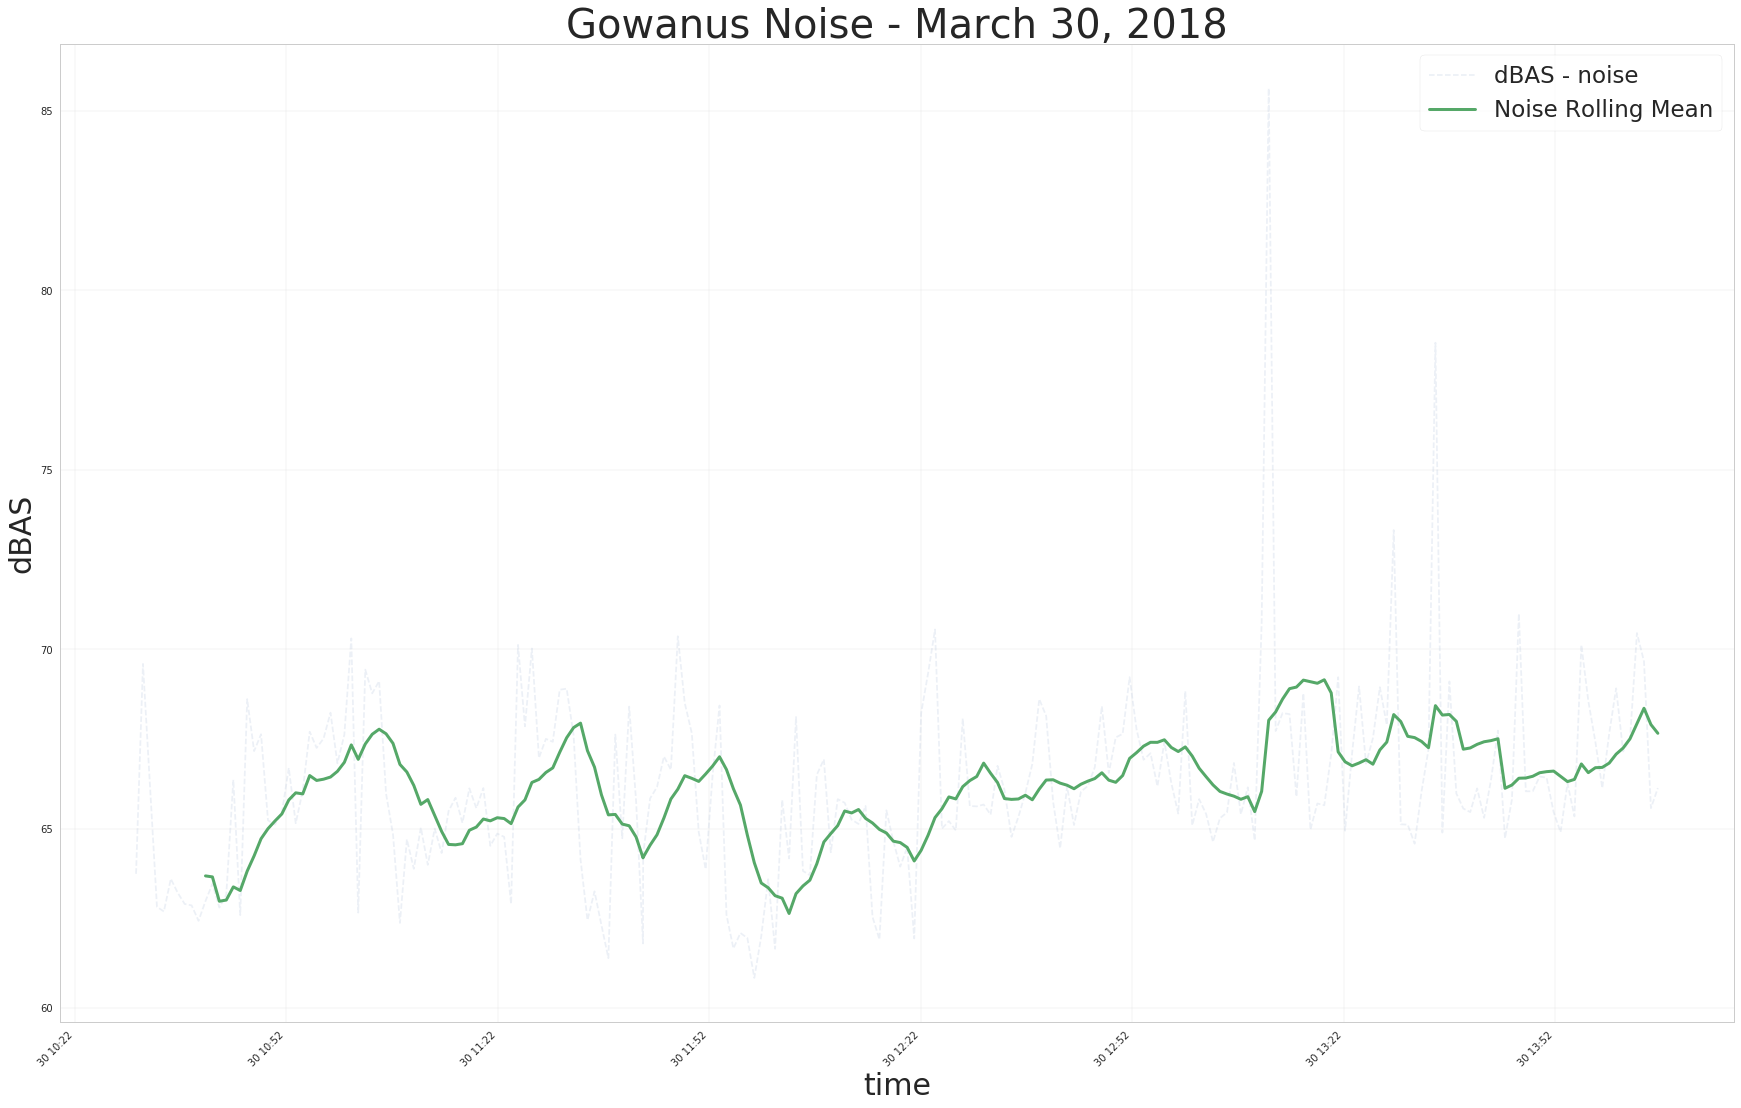

In [27]:
noise_rmean = pd.rolling_mean(df_330.dBAS, 10, center=False)

fig = plt.figure(figsize=(30,18))
ax = fig.add_subplot(111)

# rough guess to play with vis, cutting out last weird chunk
ax.plot(df_330.time, df_330.dBAS, '--', label='dBAS - noise', alpha=.1)
ax.plot(df_330.time, noise_rmean, linewidth=3, label="Noise Rolling Mean")

plt.title('Gowanus Noise - March 30, 2018', fontsize=40)
plt.ylabel('dBAS', fontsize=30)
plt.xlabel('time', fontsize=30)
plt.legend(prop={'size': 23}, frameon=True)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid(linewidth=.2)

/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.


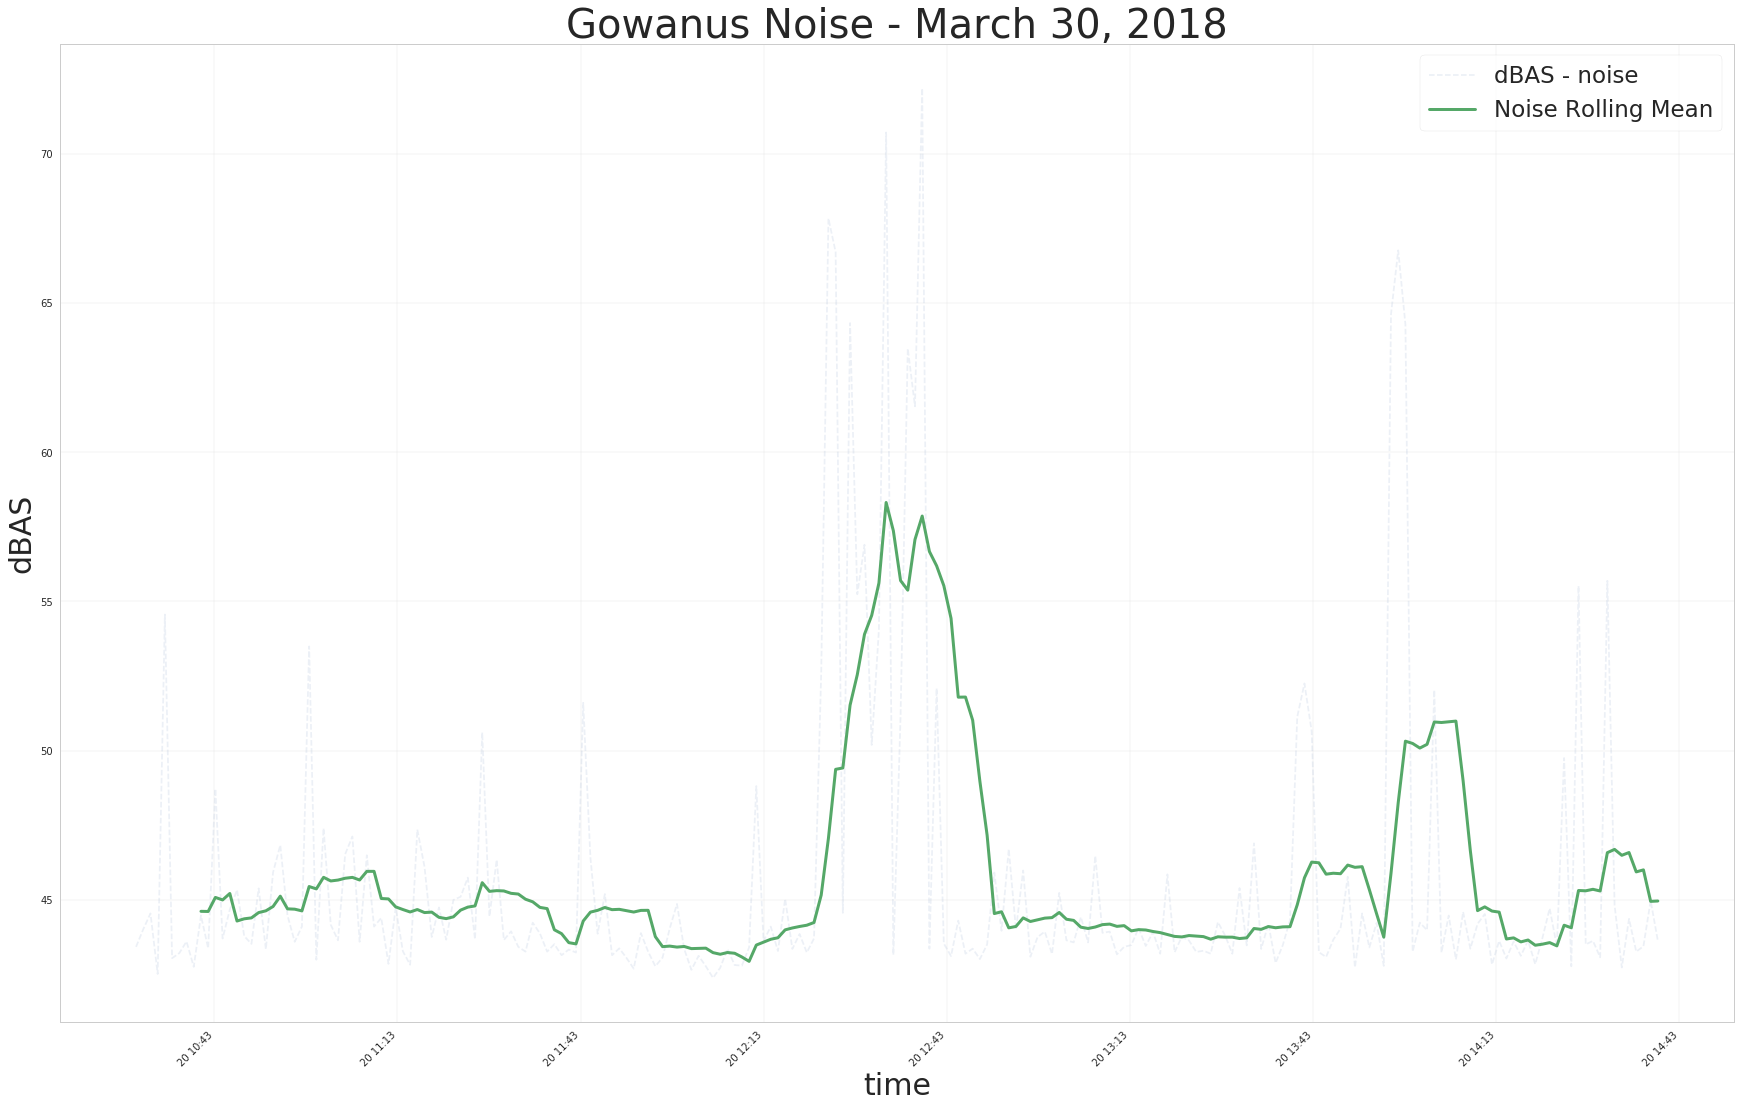

In [28]:
noise_rmean = pd.rolling_mean(df_420.dBAS, 10, center=False)

fig = plt.figure(figsize=(30,18))
ax = fig.add_subplot(111)

# rough guess to play with vis, cutting out last weird chunk
ax.plot(df_420.time, df_420.dBAS, '--', label='dBAS - noise', alpha=.1)
ax.plot(df_420.time, noise_rmean, linewidth=3, label="Noise Rolling Mean")

plt.title('Gowanus Noise - March 30, 2018', fontsize=40)
plt.ylabel('dBAS', fontsize=30)
plt.xlabel('time', fontsize=30)
plt.legend(prop={'size': 23}, frameon=True)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid(linewidth=.2)

/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.


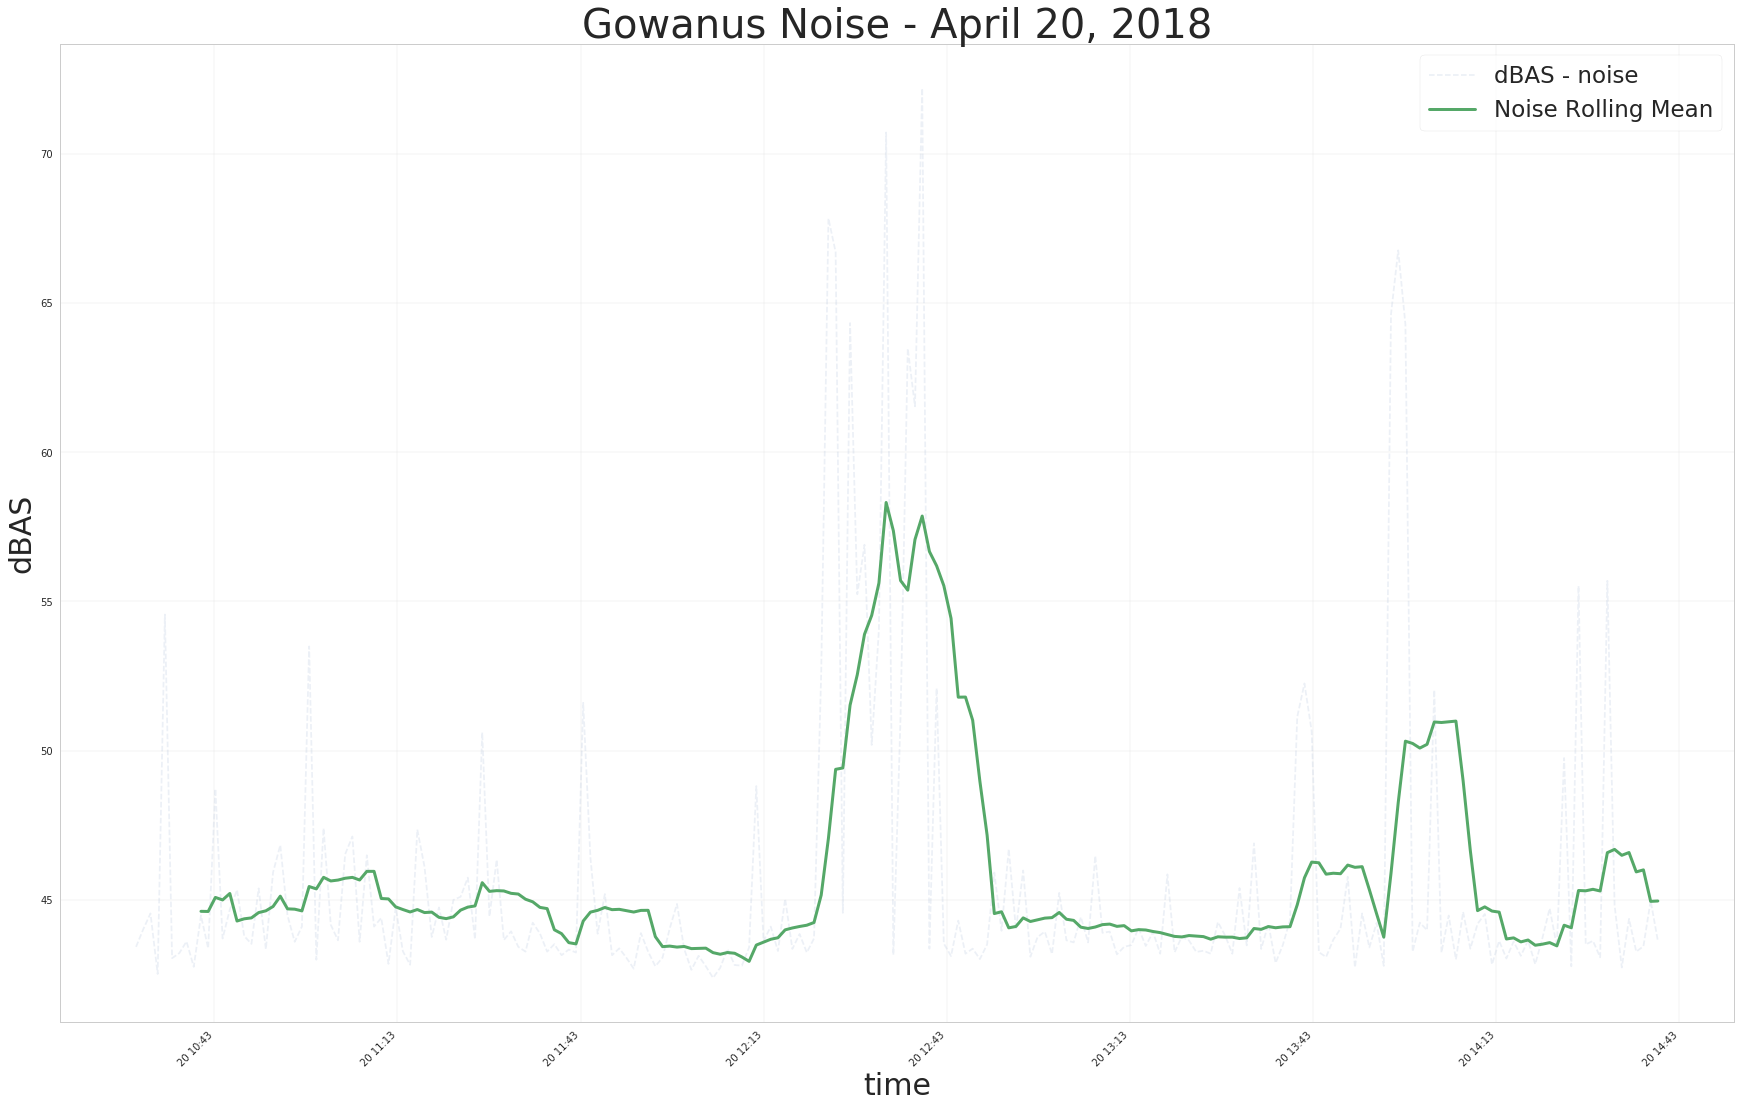

In [30]:
noise_rmean = pd.rolling_mean(df_420.dBAS, 10, center=False)

fig = plt.figure(figsize=(30,18))
ax = fig.add_subplot(111)

# rough guess to play with vis, cutting out last weird chunk
ax.plot(df_420.time, df_420.dBAS, '--', label='dBAS - noise', alpha=.1)
ax.plot(df_420.time, noise_rmean, linewidth=3, label="Noise Rolling Mean")

plt.title('Gowanus Noise - April 20, 2018', fontsize=40)
plt.ylabel('dBAS', fontsize=30)
plt.xlabel('time', fontsize=30)
plt.legend(prop={'size': 23}, frameon=True)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid(linewidth=.2)

/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':
/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.


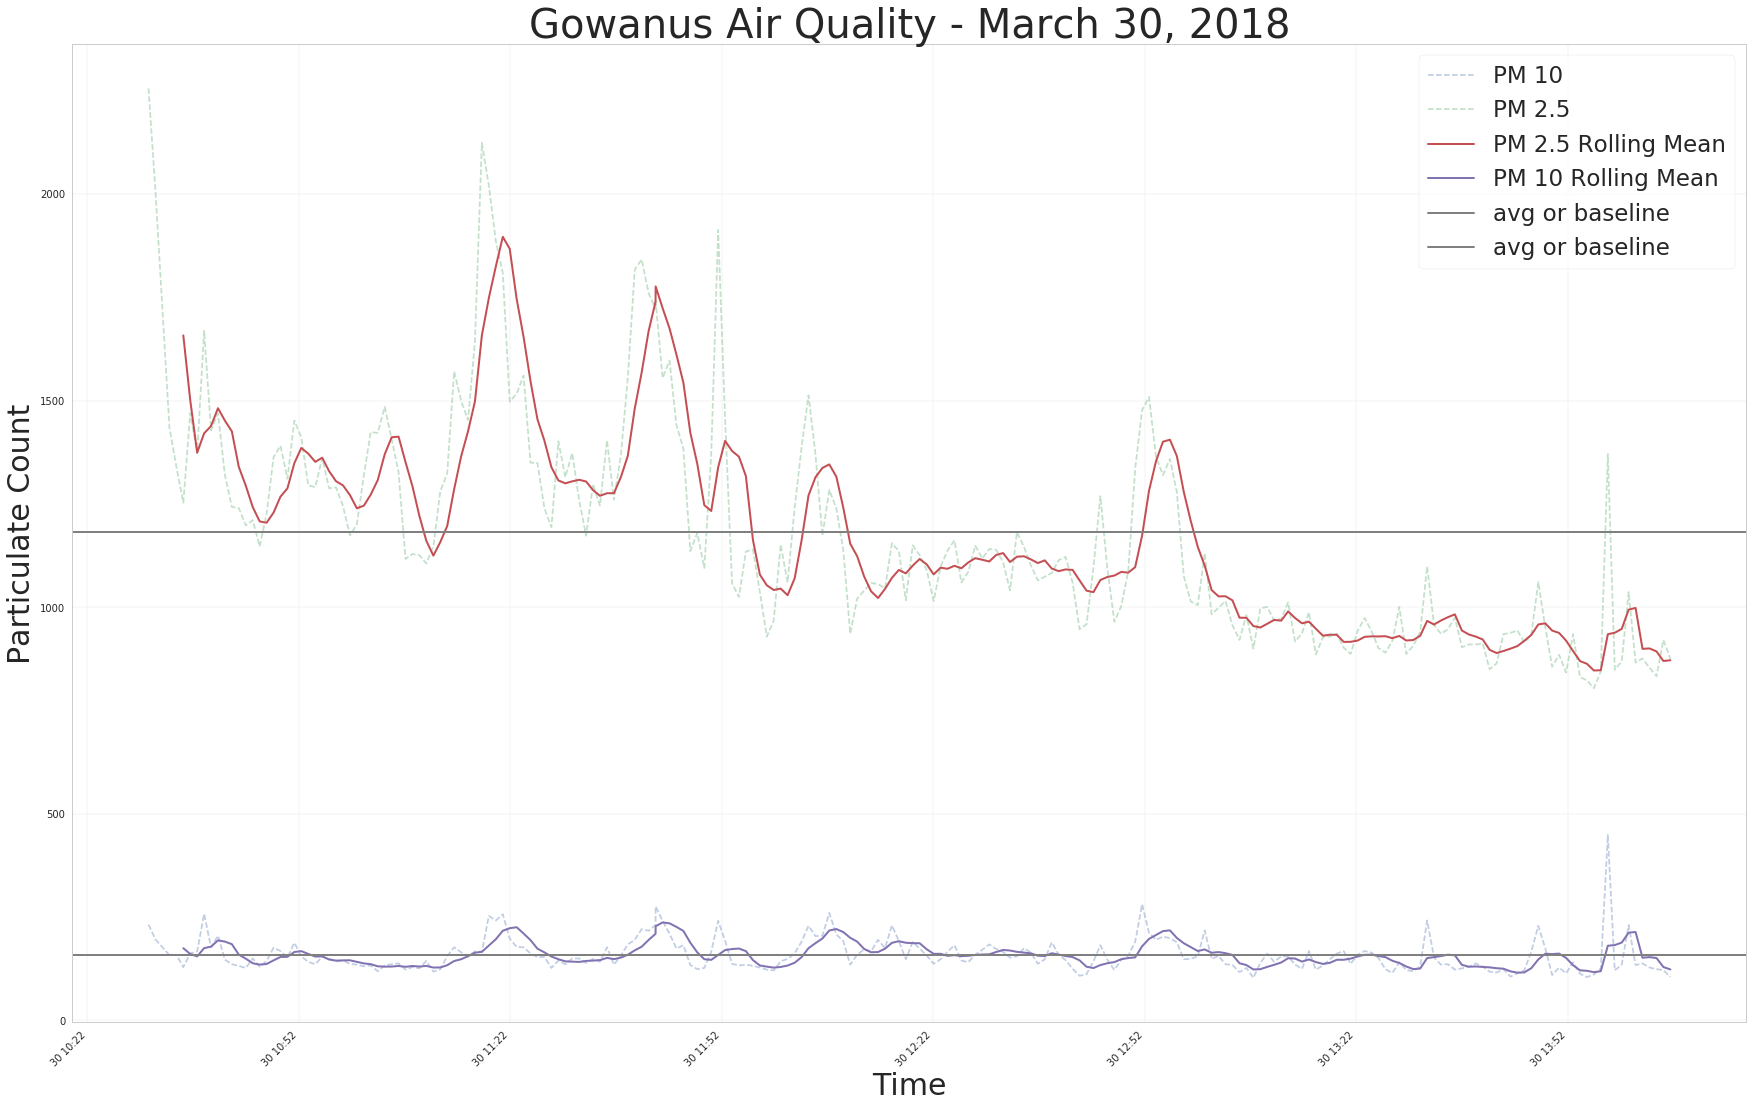

In [36]:
fig = plt.figure(figsize=(30,18))
ax = fig.add_subplot(111)

# plotting with both dataframes 
ax.plot(df_330.time, df_330.PM10, '--', label='PM 10', alpha=.35)
ax.plot(df_330.time, df_330.PM25, '--', label='PM 2.5', alpha=.35)

# define rolling means for plotting
air10_rmean = pd.rolling_mean(df_330.PM10, 5, center=False)
air25_rmean = pd.rolling_mean(df_330.PM25, 5, center=False)

# plotting with rolling means, window = 8
ax.plot(df_330.time, air25_rmean, linewidth=2, label="PM 2.5 Rolling Mean")
ax.plot(df_330.time, air10_rmean, linewidth=2, label="PM 10 Rolling Mean")

# add horintal lines for baselines/averages/whatever
plt.axhline(df_330.PM10.mean(), color='gray', linewidth=2, label = 'avg or baseline')
plt.axhline(df_330.PM25.mean(), color='gray', linewidth=2, label = 'avg or baseline')

#add verical lines for events
#plt.axvline(df_330.ix[120,3], color='red', label= 'sample event')

plt.title('Gowanus Air Quality - March 30, 2018', fontsize=40)
plt.ylabel('Particulate Count', fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.legend(prop={'size': 23}, frameon=True)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid(linewidth=.2)

/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  if __name__ == '__main__':
/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.


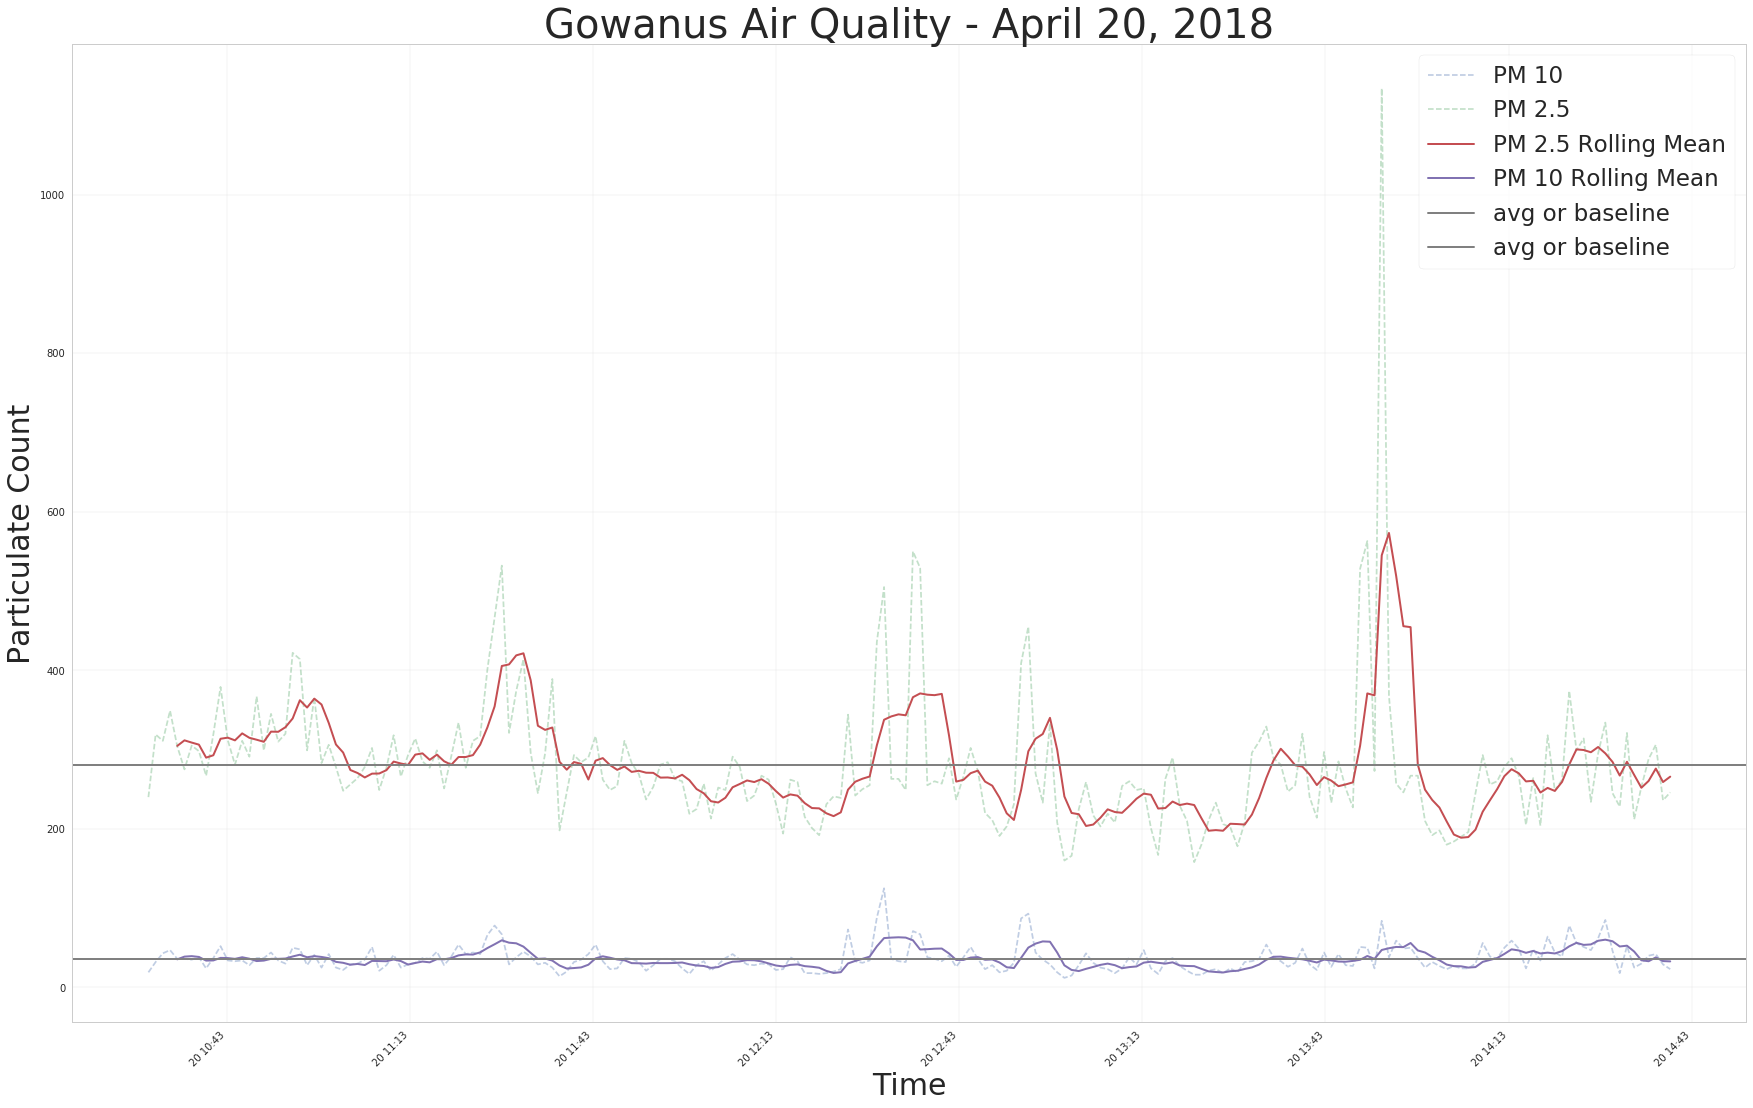

In [35]:
fig = plt.figure(figsize=(30,18))
ax = fig.add_subplot(111)

# plotting with both dataframes 
ax.plot(df_420.time, df_420.PM10, '--', label='PM 10', alpha=.35)
ax.plot(df_420.time, df_420.PM25, '--', label='PM 2.5', alpha=.35)

# define rolling means for plotting
air10_rmean = pd.rolling_mean(df_420.PM10, 5, center=False)
air25_rmean = pd.rolling_mean(df_420.PM25, 5, center=False)

# plotting with rolling means, window = 8
ax.plot(df_420.time, air25_rmean, linewidth=2, label="PM 2.5 Rolling Mean")
ax.plot(df_420.time, air10_rmean, linewidth=2, label="PM 10 Rolling Mean")

# add horintal lines for baselines/averages/whatever
plt.axhline(df_420.PM10.mean(), color='gray', linewidth=2, label = 'avg or baseline')
plt.axhline(df_420.PM25.mean(), color='gray', linewidth=2, label = 'avg or baseline')

#add verical lines for events
#plt.axvline(df_420.ix[120,3], color='red', label= 'sample event')

plt.title('Gowanus Air Quality - April 20, 2018', fontsize=40)
plt.ylabel('Particulate Count', fontsize=30)
plt.xlabel('Time', fontsize=30)
plt.legend(prop={'size': 23}, frameon=True)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid(linewidth=.2)

/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  """
/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  


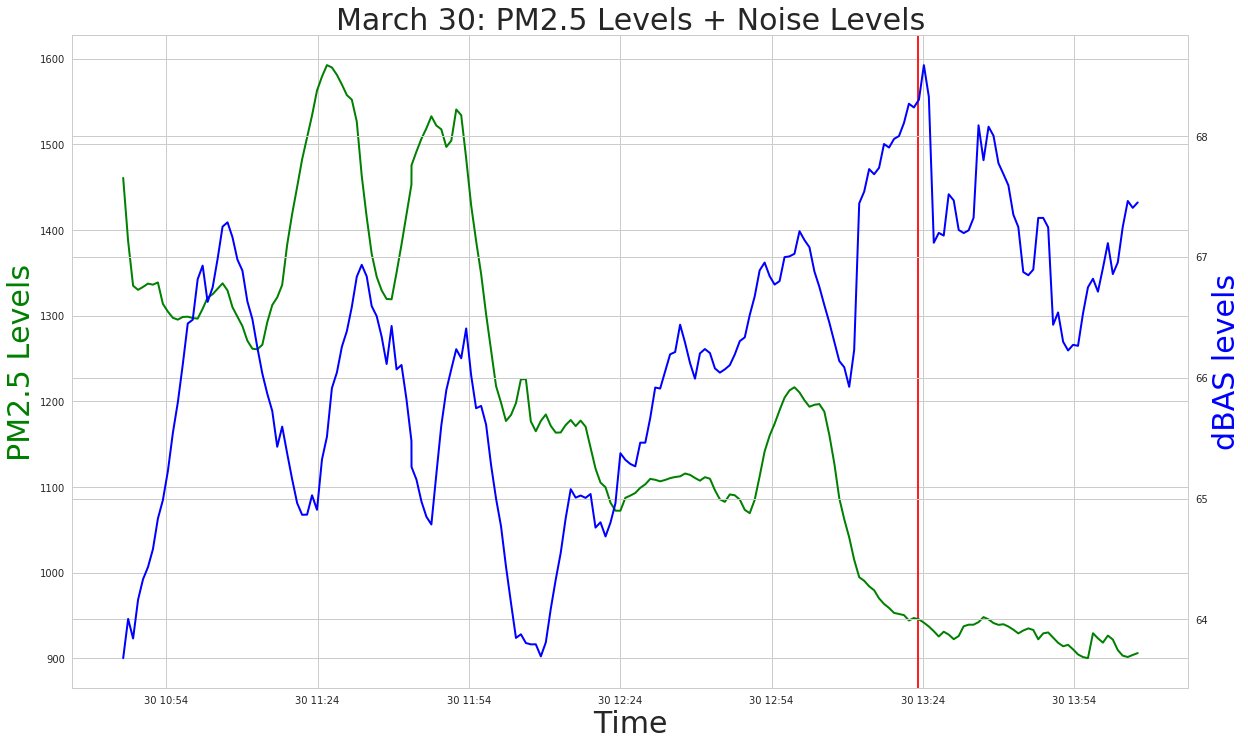

In [68]:
fig, ax1 = plt.subplots(figsize=(20,12))

# create rolling means for pretty plotting
# note: same window now that lens are equal
pm25_df_330_rm = pd.rolling_mean(df_330.PM25, 15, center=False)
dbas_df_330_rm = pd.rolling_mean(df_330.dBAS, 15, center=False)

#Plotting Events
plt.axvline(dt.datetime(2018, 3, 30,13,23), color='red', label= 'Start of substantial operations')

# plt.axvline(dt.datetime(2018, 4, 20,11,0), color='red', label= 'Start of Lunch Break')

# twinx!
ax2 = ax1.twinx()
ax1.plot(df_330.time, pm25_df_330_rm, 'g-', linewidth=2)
ax2.plot(df_330.time, dbas_df_330_rm, 'b-', linewidth=2)

ax1.set_xlabel('Time', fontsize=30)
ax1.set_ylabel('PM2.5 Levels', color='g', fontsize=30)
ax2.set_ylabel('dBAS levels', color='b', fontsize=30)
# plt.legend(prop={'size': 23}, frameon=True) # not sure how to get both in legend
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('March 30: PM2.5 Levels + Noise Levels', fontsize=30)
plt.show()

/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  
/nfshome/jtl417/.conda/envs/JLPython2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  import sys


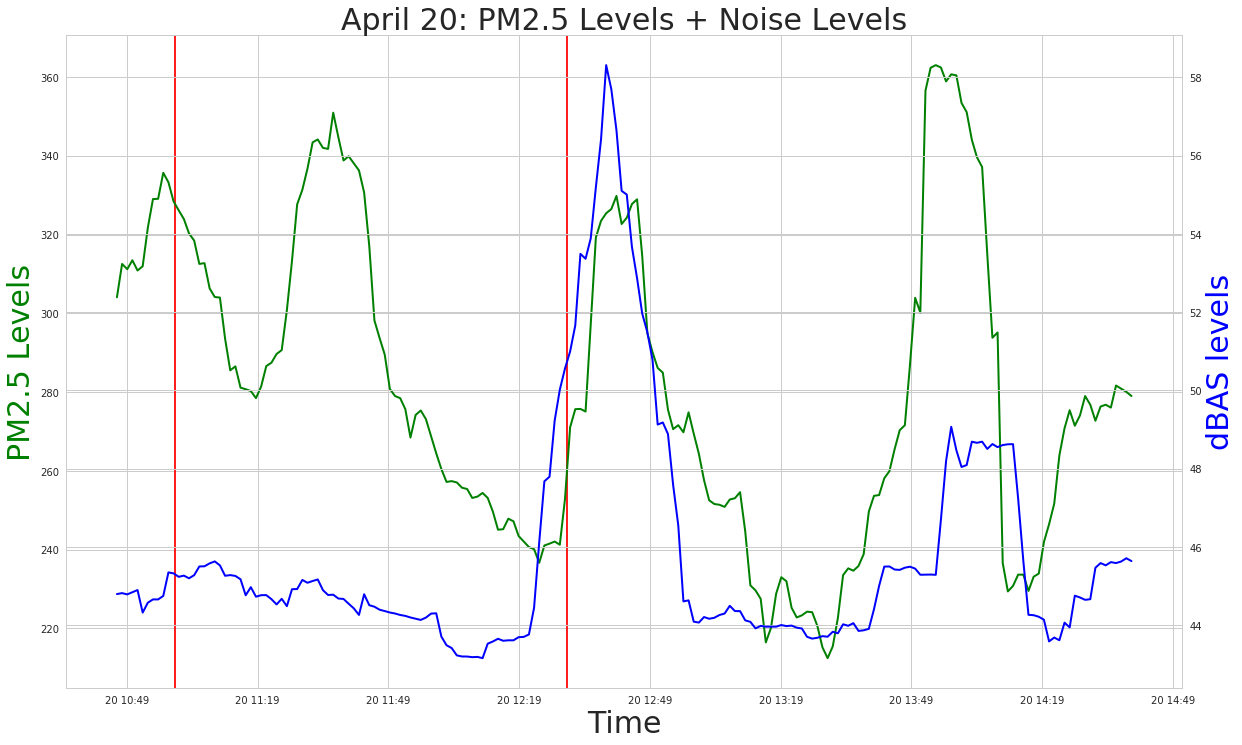

In [65]:
import datetime as dt
fig, ax1 = plt.subplots(figsize=(20,12))

# create rolling means for pretty plotting
# note: same window now that lens are equal
pm25_df_420_rm = pd.rolling_mean(df_420.PM25, 15, center=False)
dbas_df_420_rm = pd.rolling_mean(df_420.dBAS, 15, center=False)

#Events
#plt.axvline(df_420.ix[102,3], color='red', label= 'sample event')
plt.axvline(dt.datetime(2018, 4, 20,12,30), color='red', label= 'Crane Starting Up')
plt.axvline(dt.datetime(2018, 4, 20,11,0), color='red', label= 'Start of Lunch Break')

# twinx!
ax2 = ax1.twinx()
ax1.plot(df_420.time, pm25_df_420_rm, 'g-', linewidth=2)
ax2.plot(df_420.time, dbas_df_420_rm, 'b-', linewidth=2)

ax1.set_xlabel('Time', fontsize=30)
ax1.set_ylabel('PM2.5 Levels', color='g', fontsize=30)
ax2.set_ylabel('dBAS levels', color='b', fontsize=30)
# plt.legend(prop={'size': 23}, frameon=True) # not sure how to get both in legend
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('April 20: PM2.5 Levels + Noise Levels', fontsize=30)
plt.show()